In [4]:
from matplotlib import pyplot as plt
from pyopenms import *
import matplotlib.patches as mpatches
exp = MSExperiment()
#Load mzML file and store it in MSExperiment
MzMLFile().load("D:/CB/MZml/20200306_Fusion_Project_395_Agami_Remco_ATF4GFP_IFN_01.mzML",exp)
protein_ids = []
peptide_ids = []
SimpleSearchEngineAlgorithm().search("D:/CB/MZml/20200306_Fusion_Project_395_Agami_Remco_ATF4GFP_IFN_01.mzML","D:/CB/Fasta/Pr395_GFP_IP_GFP_fs_mutant.fasta", protein_ids, peptide_ids)

for peptide_id in peptide_ids:
# Peptide identification values
    print(35*"=")
    print("Peptide ID m/z:", peptide_id.getMZ())
    print("Peptide ID rt:", peptide_id.getRT())
    print("Peptide scan index:", peptide_id.getMetaValue("scan_index"))
    print("Peptide ID score type:", peptide_id.getScoreType())

# PeptideHits
for Peptide in peptide_id.getHits():
    print(" - Peptide hit sequence:", Peptide.getSequence())
    mz = Peptide.getSequence().getMonoWeight(Residue.ResidueType.Full, Peptide.getCharge()) / Peptide.getCharge()
    print(" - Peptide hit monoisotopic m/z:", mz)
    score=mz/peptide_id.getMZ()
    print("comparsion score = ", score)
    a = str(Peptide.getSequence())
    tsg = TheoreticalSpectrumGenerator()
    spec1 = MSSpectrum()
    peptide = AASequence.fromString(a)
    p = Param()
    p.setValue("add_b_ion", "true")
    p.setValue("add_metainfo", "true")
    tsg.setParameters(p)
    tsg.getSpectrum(spec1, peptide, 1, 2)
    print("Spectrum 1 of", peptide, "has", spec1.size(), "peaks.")
    tsg1 = TheoreticalSpectrumGenerator()
    theo_spectrum = MSSpectrum()
    p = tsg1.getParameters()
    experiment_spectrum = exp.getSpectrum(peptide_id.getMetaValue("scan_index"))
    p.setValue("add_y_ions", "true")
    p.setValue("add_b_ions", "true")
    p.setValue("add_metainfo", "true")
    tsg1.setParameters(p)
    peptide = AASequence.fromString(a)
    tsg1.getSpectrum(theo_spectrum, peptide, 1, 2)


Peptide ID m/z: 452.680328369141
Peptide ID rt: 1649.06897169702
Peptide scan index: 9531
Peptide ID score type: hyperscore
Peptide ID m/z: 429.547607421875
Peptide ID rt: 1756.597914033
Peptide scan index: 10538
Peptide ID score type: hyperscore
Peptide ID m/z: 429.547454833984
Peptide ID rt: 1917.16666244898
Peptide scan index: 11974
Peptide ID score type: hyperscore
Peptide ID m/z: 429.5478515625
Peptide ID rt: 1951.94337537702
Peptide scan index: 12310
Peptide ID score type: hyperscore
Peptide ID m/z: 382.208374023438
Peptide ID rt: 1961.96740132902
Peptide scan index: 12412
Peptide ID score type: hyperscore
Peptide ID m/z: 392.197631835938
Peptide ID rt: 2002.44011089698
Peptide scan index: 12798
Peptide ID score type: hyperscore
Peptide ID m/z: 727.851013183594
Peptide ID rt: 2073.77013556902
Peptide scan index: 13479
Peptide ID score type: hyperscore
Peptide ID m/z: 497.239532470703
Peptide ID rt: 2464.9120443850197
Peptide scan index: 17094
Peptide ID score type: hyperscore
Pep

Number of matched peaks: 38
ions      theoretical. m/z      experimental m/z
--------------------------------------------------
y1+	1	147.112804913371	147.0890655517578
y2++	2	147.594247833621	148.07101440429688
b2+	1	173.05568472197103	173.26901245117188
b4++	2	197.073877285771	197.0640106201172
y3++	2	216.12370394527102	216.10305786132812
b3+	1	230.07714881767106	230.09600830078125
y4++	2	289.64140395382094	290.00701904296875
y2+	1	294.18121920047105	294.0169982910156
b6++	2	322.121556509071	322.1289978027344
y5++	2	358.17086006547095	358.15606689453125
b4+	1	393.14047810477103	393.30999755859375
y6++	2	401.68687464522094	401.9990234375
y3+	1	431.24013142377106	431.01202392578125
y7++	2	459.2003467249709	459.1960144042969
y8++	2	508.73455386852095	508.28302001953125
b10++	2	522.2194574556711	522.2210083007812
b5+	1	556.203807391871	556.2530517578125
y9++	2	558.268761012071	558.3030395507812
b11++	2	565.7354720354211	565.5110473632812
y4+	1	578.275531440871	577.8660888671875
y10++	2	6

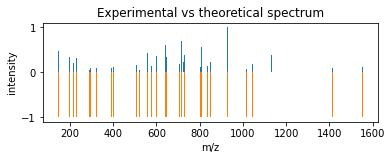

In [5]:
import numpy as np
from matplotlib import pyplot as plt

def mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title):
    obs_int = [element / max(obs_int) for element in obs_int] # relative intenstiy
    theo_int = [element * -1 for element in theo_int] # invert the intensity for the mirror plot
    #plt.figure(figsize=(12,8))
    plt.bar(obs_mz, obs_int, width = 3.0)
    plt.bar(theo_mz, theo_int, width = 3.0)
    plt.title(title)
    plt.ylabel('intensity')
    plt.xlabel('m/z')

obs_mz, obs_int = experiment_spectrum.get_peaks()

# We filter the peaks of the theoretical spectrum to fit the range (to reduce image complexity)
theo_mz, theo_int = [], []
for mz, intensity in zip(*theo_spectrum.get_peaks()):
    if mz >= 200.0 and mz <= 800.0:
        theo_mz.append(mz)
        theo_int.append(intensity)



alignment = []
spa = SpectrumAlignment()
p = spa.getParameters()
    # use 0.5 Da tolerance (Note: for high-resolution data we could also use ppm by setting the is_relative_tolerance value to true)
p.setValue("tolerance", 0.5)
p.setValue("is_relative_tolerance", "false")
spa.setParameters(p)
    # align both spectra
spa.getSpectrumAlignment(alignment, theo_spectrum, experiment_spectrum)
print("Number of matched peaks: " + str(len(alignment)))
print("ions"+"      "+"theoretical. m/z"+"      "+"experimental m/z")
print(50*"-")


for theo_idx, obs_idx in alignment:
    ion_name = theo_spectrum.getStringDataArrays()[0][theo_idx].decode()
    ion_charge = theo_spectrum.getIntegerDataArrays()[0][theo_idx]
    print(ion_name + "\t" + str(ion_charge) + "\t"
          + str(theo_spectrum[theo_idx].getMZ())
          + "\t" + str(experiment_spectrum[obs_idx].getMZ()))
b=str(peptide_id.getMetaValue("scan_index"))
print(a)

theo_mz, theo_int, obs_mz, obs_int = [], [], [], []
for theo_idx, obs_idx in alignment:
    theo_mz.append(theo_spectrum[theo_idx].getMZ())
    theo_int.append(theo_spectrum[theo_idx].getIntensity())
    obs_mz.append(experiment_spectrum[obs_idx].getMZ())
    obs_int.append(experiment_spectrum[obs_idx].getIntensity())
plt.subplot(2, 1, 1)
    # make range form 300 to 1000 to see the simialrity
title = 'Experimental vs theoretical spectrum'
mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)  
   

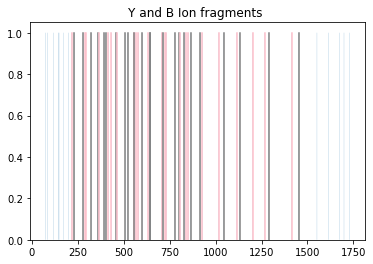

In [7]:
#y and b fragments
mz,i = spec1.get_peaks() 
plt.title("Y and B Ion fragments ")
count = 0
idx=0
annot = spec1.getStringDataArrays()[0]
bars = plt.bar(mz, i, snap=False)
for mz, i in zip(*theo_spectrum.get_peaks()):
    if mz >= 200 and mz <= 1500:
        if 'y' in theo_spectrum.getStringDataArrays()[0][count].decode():
          
            plt.plot([mz, mz], [0, i], snap=True, color="pink")

            count = count + 1
        else:
            plt.plot([mz, mz], [0, i], snap=True, color="gray")
                

            count = count + 1

plt.ylim(bottom=0)
plt.show()


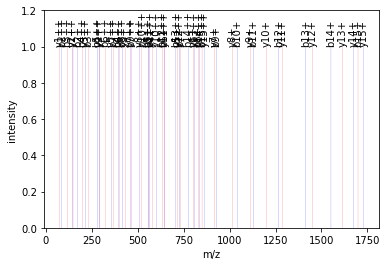

In [8]:
#can try another way
mz,i = spec1.get_peaks() 
annot = spec1.getStringDataArrays()[0] 
bars =plt.bar(spec1.get_peaks()[0], spec1.get_peaks()[1], snap=False,color =("r","b"),)
count=0
for rect in bars: 
    height = rect.get_height() 
    if "y" in annot[count].decode():
        plt.text(rect.get_x() + rect.get_width() / 2.0, height, annot[count].decode(), ha='center', va='bottom', rotation=90, snap=True)
    else :
         plt.text(rect.get_x() + rect.get_width() / 2.0, height, annot[count].decode(), ha='center', va='bottom', rotation=90,snap=True) 
    idx += 1 
    count+=1
    plt.ylim(top=1.2) 
    plt.xlabel("m/z") 
    plt.ylabel("intensity")

In [12]:
#Proteolytic Digestion with Trypsin
dig = ProteaseDigestion()
dig.getEnzymeName()
entries=[]
f=FASTAFile()
f.load("C:/Users/DELL/Desktop/uniprot-reviewed_yes+disease__Lung+cancer+[DI-02205]_.fasta",entries)
c=0
while c<len(entries)-1:
    f=AASequence.fromString(entries[c].sequence)
    print("sequence: ",c)
    result = []
    dig.digest(f, result)
    c=c+1
peptides=[AASequence.fromString(s.toString()) for s in result]
for peptide in peptides:
    tsg=TheoreticalSpectrumGenerator()
    spec1=MSSpectrum()
    p=Param()
    p.setValue("add_y_ions","true")
    p.setValue("add_b_ions","true")
    p.setValue("add_metainfo","true")
    tsg.setParameters(p)
    tsg.getSpectrum(spec1,peptide,1,1)
    print("Spectrum 1 of",peptide,"has",spec1.size(),"peaks")
for ion,peak in zip(spec1.getStringDataArrays()[0],spec1):
    print(ion.decode(),"is generated at m/z",peak.getMZ())
  

sequence:  0
sequence:  1
sequence:  2
sequence:  3
sequence:  4
sequence:  5
Spectrum 1 of MEEPQSDPSVEPPLSQETFSDLWK has 45 peaks
Spectrum 1 of LLPENNVLSPLPSQAMDDLMLSPDDIEQWFTEDPGPDEAPR has 79 peaks
Spectrum 1 of MPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQK has 69 peaks
Spectrum 1 of TYQGSYGFR has 15 peaks
Spectrum 1 of LGFLHSGTAK has 17 peaks
Spectrum 1 of SVTCTYSPALNK has 21 peaks
Spectrum 1 of MFCQLAK has 11 peaks
Spectrum 1 of TCPVQLWVDSTPPPGTR has 31 peaks
Spectrum 1 of VR has 1 peaks
Spectrum 1 of AMAIYK has 9 peaks
Spectrum 1 of QSQHMTEVVR has 17 peaks
Spectrum 1 of R has 0 peaks
Spectrum 1 of CPHHER has 9 peaks
Spectrum 1 of CSDSDGLAPPQHLIR has 27 peaks
Spectrum 1 of VEGNLR has 9 peaks
Spectrum 1 of VEYLDDR has 11 peaks
Spectrum 1 of NTFR has 5 peaks
Spectrum 1 of HSVVVPYEPPEVGSDCTTIHYNYMCNSSCMGGMNR has 67 peaks
Spectrum 1 of RPILTIITLEDSSGNLLGR has 35 peaks
Spectrum 1 of NSFEVR has 9 peaks
Spectrum 1 of VCACPGR has 11 peaks
Spectrum 1 of DR has 1 peaks
Spectrum 1 of R has 0 peaks
Spec

In [ ]:
from matplotlib import pyplot as plt
from pyopenms import *
import matplotlib.patches as mpatches
exp = MSExperiment()
#Load mzML file and store it in MSExperiment
MzMLFile().load("D:/CB/MZml/20200306_Fusion_Project_395_Agami_Remco_ATF4GFP_Ctrl_02.mzML",exp)
protein_ids = []
peptide_ids = []
SimpleSearchEngineAlgorithm().search("D:/CB/MZml/20200306_Fusion_Project_395_Agami_Remco_ATF4GFP_Ctrl_02.mzML","D:/CB/Fasta/Pr395_GFP_IP_GFP_fs_mutant.fasta", protein_ids, peptide_ids)

for peptide_id in peptide_ids:
  # Peptide identification values
    print(35*"=")
    print("Peptide ID m/z:", peptide_id.getMZ())
    print("Peptide ID rt:", peptide_id.getRT())
    print("Peptide scan index:", peptide_id.getMetaValue("scan_index"))
    print("Peptide ID score type:", peptide_id.getScoreType())

  #Show all Data in peptides
    for hit in peptide_id.getHits():
        print(" - Peptide hit sequence:", hit.getSequence())
        mz = hit.getSequence().getMonoWeight(Residue.ResidueType.Full, hit.getCharge()) / hit.getCharge()
        print(" - Peptide hit monoisotopic m/z:", mz)
        score=mz/peptide_id.getMZ()
        print("comparsion score = ", score)
        a = str(hit.getSequence())
        tsg = TheoreticalSpectrumGenerator()
        spec1 = MSSpectrum()
        peptide = AASequence.fromString(a)
        p = Param()
        p.setValue("add_b_ion", "true")
        p.setValue("add_metainfo", "true")
        tsg.setParameters(p)
        tsg.getSpectrum(spec1, peptide, 1, 2)
        tsg1 = TheoreticalSpectrumGenerator()
        theo_spectrum = MSSpectrum()
        p = tsg1.getParameters()
        p.setValue("add_y_ions", "true")
        p.setValue("add_b_ions", "true")
        p.setValue("add_metainfo", "true")
        tsg1.setParameters(p)
        peptide = AASequence.fromString(a)
        tsg1.getSpectrum(theo_spectrum, peptide, 1, 2)
        print("Spectrum 1 of", peptide, "has", spec1.size(), "peaks.")
